# Wprowadzenie do biblioteki River

[River](https://github.com/online-ml/river) jest obecnie kluczową biblioteką z dziedziny online machine learning. Jest wynikiem połączenia dwóch bibliotek [creme](https://github.com/MaxHalford/creme) i [scikit-multiflow](https://github.com/scikit-multiflow/scikit-multiflow). Jest głównie napisana w języku Python, przy czym intensywne obliczeniowo operacje przeniesiono do języka Rust.

Jej główna funkcjonalność obejmuje m.in.:
- Modele liniowe i Klasyczne modele maszynowego uczenia 
- Wykrywanie anomalii czy  koncept dryftu
- Systemy rekomendycjne
- Prognozowanie na podstawie szeregów czasowych
- Uczenie niezbalansowanych danych
- Klasteryzacja
- Metryki i statystyki dedykowane do Online Machine Learningu

Strona główna jest dostępna pod adresem: [[LINK]](https://riverml.xyz/0.14.0/)
Tutoriale [[LINK]](https://riverml.xyz/0.14.0/recipes/reading-data/), Przykłady [[LINK]](https://riverml.xyz/0.14.0/examples/batch-to-online/), Dokumentacja [[LINK]](https://riverml.xyz/0.14.0/api/overview/)

## Wczytywanie zbiorów

### Loadery biblioteki river

Przedstawienie formatów danych wspierających przez bibliotekę river przedstawiono w poniższej tabeli:

| Format danych | Loader
| --- | --- |
| arff | [stream.iter_arff](https://riverml.xyz/0.14.0/api/stream/iter-arff/) |
| numpy array | [stream.iter_array](https://riverml.xyz/0.14.0/api/stream/iter-array/)|
| csv | [stream.iter_csv](https://riverml.xyz/0.14.0/api/stream/iter-csv/) |
| LIBSVM | [stream.iter_libsvm](https://riverml.xyz/0.14.0/api/stream/iter-libsvm/) |
| pandas DataFrame | [stream.iter_pandas](https://riverml.xyz/0.14.0/api/stream/iter-pandas/) |
| sklearn dataset | [stream.iter_sklearn_dataset](https://riverml.xyz/0.14.0/api/stream/iter-sklearn-dataset/) |
| sql | [stream.iter_sql](https://riverml.xyz/0.14.0/api/stream/iter-sql/) |
| vaex DataFrame | [stream.iter_vaex](https://riverml.xyz/0.14.0/api/stream/iter-vaex/)

### Zbiory danych w bibliotece river

River udostępnia pakiet zbiorów danych wraz z odpowiednimi loaderami. 
Pełną listę zbiorów można przejrzeć na stronie biblioteki [[LINK]](https://riverml.xyz/0.13.0/api/datasets/AirlinePassengers/)


### Wczytywanie zbioru MovieLens100K

In [9]:
from river.datasets import MovieLens100K

ds = MovieLens100K()
ds_path = ds.path
ds

MovieLens 100K dataset.

MovieLens datasets were collected by the GroupLens Research Project at the University of
Minnesota. This dataset consists of 100,000 ratings (1-5) from 943 users on 1682 movies. Each
user has rated at least 20 movies. User and movie information are provided. The data was
collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from
September 19th, 1997 through April 22nd, 1998.

      Name  MovieLens100K                                            
      Task  Regression                                               
   Samples  100,000                                                  
  Features  10                                                       
    Sparse  False                                                    
      Path  /Users/kamiltagowski/river_data/MovieLens100K/ml_100k.csv
       URL  https://maxhalford.github.io/files/datasets/ml_100k.zip  
      Size  10.55 MB                                                 

### Dostęp do elementów w zbiorze


In [10]:
next(iter(ds))

({'user': '259',
  'item': '255',
  'timestamp': 874731910000000000,
  'title': "My Best Friend's Wedding (1997)",
  'release_date': 866764800000000000,
  'genres': 'comedy, romance',
  'age': 21.0,
  'gender': 'M',
  'occupation': 'student',
  'zip_code': '48823'},
 4.0)

### Pętla 

In [11]:
# Import w celu czytelniejszego wyświetlania słowników
from IPython.display import display_pretty

for x, y in ds:
    display_pretty(x, y)
    break

{'user': '259',
 'item': '255',
 'timestamp': 874731910000000000,
 'title': "My Best Friend's Wedding (1997)",
 'release_date': 866764800000000000,
 'genres': 'comedy, romance',
 'age': 21.0,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

4.0

### Pobieranie kilku elementów ze zbioru
Dla tej paczki zbiorów danych przygotowano także metodę take, która umożliwia pobranie kilku elementów ze strumienia

In [12]:
for x, y in ds.take(k=2):
    display_pretty(x, y)

{'user': '259',
 'item': '255',
 'timestamp': 874731910000000000,
 'title': "My Best Friend's Wedding (1997)",
 'release_date': 866764800000000000,
 'genres': 'comedy, romance',
 'age': 21.0,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

4.0

{'user': '259',
 'item': '286',
 'timestamp': 874731927000000000,
 'title': 'English Patient, The (1996)',
 'release_date': 848016000000000000,
 'genres': 'drama, romance, war',
 'age': 21.0,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

4.0

### Wczytanie zbioru za pomocą dostępnych loaderów

In [13]:
from river.stream import iter_csv

ds = iter_csv(ds_path, delimiter="\t")

for x, y in ds:
    display_pretty(x, y)
    break

{'user': '259',
 'item': '255',
 'rating': '4.0',
 'timestamp': '874731910000000000',
 'title': "My Best Friend's Wedding (1997)",
 'release_date': '866764800000000000',
 'genres': 'comedy, romance',
 'age': '21',
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

None

Jak widzimy, powyżej zbiór wczytany jest w postaci stringów, a zmienna y jest nieznana. 
Aby to rozwiązać potrzebujemy zdefiniować dane.

In [14]:
from river.stream import iter_csv

ds = iter_csv(
    ds_path,
    delimiter="\t",
    target="rating",
    converters={
        "rating": float,
        "age": int,
        "timestamp": int,
        "release_date": int,
    },
)

for x, y in ds:
    display_pretty(x, y)
    break

{'user': '259',
 'item': '255',
 'timestamp': 874731910000000000,
 'title': "My Best Friend's Wedding (1997)",
 'release_date': 866764800000000000,
 'genres': 'comedy, romance',
 'age': 21,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

4.0

### Wczytywanie za pomocą bilioteki pandas

In [15]:
import pandas as pd
from river.stream import iter_pandas

df = pd.read_csv(ds_path, sep="\t")
df_y = df.pop("rating")
ds = iter_pandas(df, y=df_y)

for x, y in ds:
    display_pretty(x, y)
    break

{'user': 259,
 'item': 255,
 'timestamp': 874731910000000000,
 'title': "My Best Friend's Wedding (1997)",
 'release_date': 866764800000000000,
 'genres': 'comedy, romance',
 'age': 21,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

4.0

## Przetwarzanie zbioru

### Rozkład klas - wczytany cały zbiór

Wyświetlijmy teraz rozkład klas. W pierwszej kolejności zróbmy to naiwnie, poprzez wykorzystanie całego zaczytanego zbioru

<AxesSubplot: >

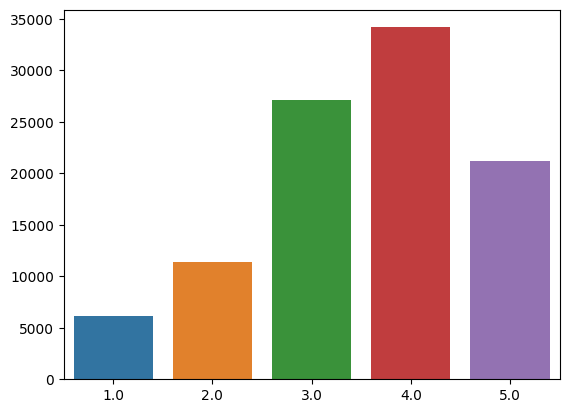

In [16]:
from collections import Counter

import seaborn as sns

counter = Counter(df_y.values)
sns.barplot(y=list(counter.values()), x=list(counter.keys()), errorbar=None)

### Rozkład klas - podejście strumieniowe

<AxesSubplot: >

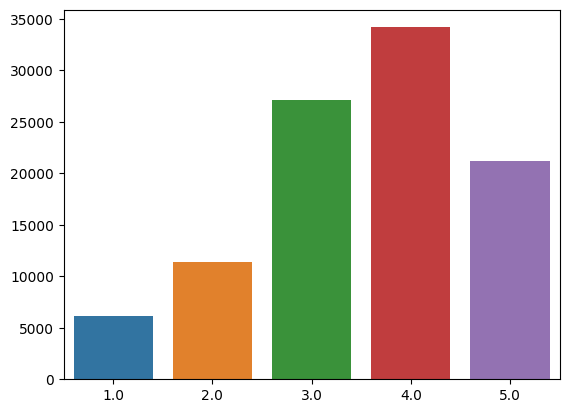

In [17]:
from river.sketch import Histogram

hist = Histogram(max_bins=5)

for x, y in ds:
    hist = hist.update(y)
    
sns.barplot(y=[b.count for b in hist], x=[b.left for b in hist], errorbar=None)

### Rozkład klas - podejście strumieniowe przybliżone 

In [18]:
from river.sketch import Counter

cms = Counter(seed=441)
ds = iter_pandas(df, y=df_y)
values = set()

for x, y in ds:
    cms = cms.update(int(y))
    values.add(int(y))

#### Porównanie wartości

In [19]:
for val_id, value in enumerate(values):
    print(
        "Rating",
        value,
        "hist_counter",
        hist[val_id].count,
        "approx_count",
        cms[value],
        "error",
        abs(hist[val_id].count - cms[value]),
    )

Rating 1 hist_counter 6110 approx_count 6110 error 0
Rating 2 hist_counter 11370 approx_count 11370 error 0
Rating 3 hist_counter 27145 approx_count 27145 error 0
Rating 4 hist_counter 34173 approx_count 34174 error 1
Rating 5 hist_counter 21201 approx_count 21201 error 0


## Transformacje cech

Zacznijmy od transformacji cech, w naszym zbiorze w dalszym ciągu mamy nieprzetworzone timestampy przetwórzmy ja do formatu `datetime`

In [20]:
import datetime

ds = iter_pandas(df, y=df_y)

for x, y in ds:
    for date_column in ("timestamp", "release_date"):
        x[date_column] = datetime.datetime.fromtimestamp(x[date_column] / 1e9)

    display_pretty(x)
    break

{'user': 259,
 'item': 255,
 'timestamp': datetime.datetime(1997, 9, 20, 7, 5, 10),
 'title': "My Best Friend's Wedding (1997)",
 'release_date': datetime.datetime(1997, 6, 20, 2, 0),
 'genres': 'comedy, romance',
 'age': 21,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823'}

Dodajmy teraz przetwarzanie tytułów za pomocą algorytmu `LDA`. Do tego celu wykorzystamy klase [`LDA`](https://riverml.xyz/0.14.0/api/preprocessing/LDA/)

In [21]:
from river.feature_extraction import BagOfWords
from river.preprocessing import LDA

bow = BagOfWords(on="title")
lda = LDA(seed=441)

for x, y in ds:
    bow_title = bow.learn_one(x).transform_one(x)
    display_pretty(lda.learn_one(bow_title).transform_one(bow_title))
    break

{0: 0.5,
 1: 1.5,
 2: 0.5,
 3: 0.5,
 4: 1.5,
 5: 0.5,
 6: 0.5,
 7: 1.5,
 8: 0.5,
 9: 1.5}

Złączmy teraz obie funkcje do jednego kodu:


In [22]:
for x, y in ds:
    for date_column in ("timestamp", "release_date"):
        x[date_column] = datetime.datetime.fromtimestamp(x[date_column] / 1e9)

        bow_title = bow.learn_one(x).transform_one(x)
        x["title_lda"] = lda.learn_one(bow_title).transform_one(bow_title)

    display_pretty(x)
    break

{'user': 259,
 'item': 298,
 'timestamp': datetime.datetime(1997, 9, 20, 7, 5, 54),
 'title': 'Face/Off (1997)',
 'release_date': datetime.datetime(1997, 6, 27, 2, 0),
 'genres': 'action, sci_fi, thriller',
 'age': 21,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823',
 'title_lda': {0: 0.5,
  1: 0.5,
  2: 0.5,
  3: 1.5,
  4: 0.5,
  5: 0.5,
  6: 0.5,
  7: 0.5,
  8: 2.5,
  9: 0.5}}

Zamiast ręcznie pisać cały kod kolejnych transformacji możemy je złączyć w jedną za pomocą klasy [`TransformerUnion`](https://riverml.xyz/0.14.0/api/compose/TransformerUnion/). W tym calu musimy jednak mieć naszą metodę transformującą dane za pomocą metody [`FuncTransformer`](https://riverml.xyz/0.14.0/api/compose/FuncTransformer/). Napiszmy ją teraz

In [23]:
from typing import Dict, Any

from river.compose import FuncTransformer


class TimestamptoDateConverter:
    def __init__(self, col_name: str):
        self.col_name = col_name

    def __call__(self, x: Dict[str, Any]) -> Dict[str, datetime.datetime]:
        # Do not assume incorrectly that something is a date in timestamp format
        assert isinstance(x[self.col_name], int)
        return {
            f"{self.col_name}_date": datetime.datetime.fromtimestamp(
                x[self.col_name] / 1e9
            )
        }


date_transform = FuncTransformer(TimestamptoDateConverter(col_name="timestamp"))

for x, y in ds:
    x.update(date_transform.transform_one(x))

    display_pretty(x)
    break

{'user': 259,
 'item': 185,
 'timestamp': 874731981000000000,
 'title': 'Psycho (1960)',
 'release_date': -315619200000000000,
 'genres': 'horror, romance, thriller',
 'age': 21,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823',
 'timestamp_date': datetime.datetime(1997, 9, 20, 7, 6, 21)}

Teraz połączmy wszystko w jedną aggregację


In [27]:
from river.compose import Pipeline, TransformerUnion

transforms = TransformerUnion(
    FuncTransformer(TimestamptoDateConverter(col_name="timestamp")),
    FuncTransformer(TimestamptoDateConverter(col_name="release_date")),
)

lda = Pipeline(BagOfWords(on="title"), LDA(seed=441))

for x, y in ds:
    x.update(transforms.learn_one(x).transform_one(x))
    x["lda"] = lda.learn_one(x).transform_one(x)

    display_pretty(x)
    break

{'user': 259,
 'item': 108,
 'timestamp': 874732082000000000,
 'title': 'Kids in the Hall: Brain Candy (1996)',
 'release_date': 829267200000000000,
 'genres': 'comedy',
 'age': 21,
 'gender': 'M',
 'occupation': 'student',
 'zip_code': '48823',
 'release_date_date': datetime.datetime(1996, 4, 12, 2, 0),
 'timestamp_date': datetime.datetime(1997, 9, 20, 7, 8, 2),
 'lda': {0: 0.5,
  1: 1.5,
  2: 2.5,
  3: 0.5,
  4: 1.5,
  5: 1.5,
  6: 2.5,
  7: 0.5,
  8: 0.5,
  9: 0.5}}

### Agregacje

Aggregacje w bibliotece river wykonujemy za pomocą modułu [Agg](https://riverml.xyz/0.14.0/api/feature-extraction/Agg/)

### Obliczenie liczby recenzji użytkownika

In [30]:
from river.feature_extraction import TargetAgg
from river.stats import Count

ds = iter_pandas(df.iloc[0:20], y=df_y[0:20])

agg = TargetAgg(by=["user"], how=Count())
for x, y in ds:
    display_pretty({"user": x["user"], **agg.learn_one(x, y).transform_one(x)})

{'user': 259, 'y_count_by_user': 1}

{'user': 259, 'y_count_by_user': 2}

{'user': 259, 'y_count_by_user': 3}

{'user': 259, 'y_count_by_user': 4}

{'user': 259, 'y_count_by_user': 5}

{'user': 259, 'y_count_by_user': 6}

{'user': 259, 'y_count_by_user': 7}

{'user': 259, 'y_count_by_user': 8}

{'user': 259, 'y_count_by_user': 9}

{'user': 259, 'y_count_by_user': 10}

{'user': 259, 'y_count_by_user': 11}

{'user': 259, 'y_count_by_user': 12}

{'user': 259, 'y_count_by_user': 13}

{'user': 259, 'y_count_by_user': 14}

{'user': 259, 'y_count_by_user': 15}

{'user': 259, 'y_count_by_user': 16}

{'user': 851, 'y_count_by_user': 1}

{'user': 851, 'y_count_by_user': 2}

{'user': 851, 'y_count_by_user': 3}

{'user': 851, 'y_count_by_user': 4}

### Aggregacje typu Rolling

Średnia ocena recenzja z ostatnich 5

In [35]:
from river.utils import Rolling
from river.stats import Mean

ds = iter_pandas(df.iloc[0:20], y=df_y[0:20])

agg = TargetAgg(by=["user"], how=Rolling(Mean(), 5))
for x, y in ds:
    display_pretty({"user": x["user"], **agg.learn_one(x, y).transform_one(x)})

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 4.0}

{'user': 259, 'y_mean_by_user': 3.8}

{'user': 259, 'y_mean_by_user': 3.8}

{'user': 259, 'y_mean_by_user': 3.8}

{'user': 259, 'y_mean_by_user': 3.8}

{'user': 259, 'y_mean_by_user': 3.6}

{'user': 259, 'y_mean_by_user': 3.6}

{'user': 259, 'y_mean_by_user': 3.6}

{'user': 259, 'y_mean_by_user': 3.8}

{'user': 259, 'y_mean_by_user': 3.8}

{'user': 851, 'y_mean_by_user': 2.0}

{'user': 851, 'y_mean_by_user': 2.5}

{'user': 851, 'y_mean_by_user': 2.6666666666666665}

{'user': 851, 'y_mean_by_user': 3.25}